# Part 1 - RGB Images

In [11]:
import scipy.io as sio
import os

path = 'C:/Users/DarkB/Downloads/ML Python Scripts/Project 1/ImsAndSegs'

# mat_contents = []
# for filename in os.listdir(path):
#     print(path+'/'+filename)
#     mat_contents = mat_contents.append(sio.loadmat(path+'/'+filename))
z = sio.loadmat('C:/Users/DarkB/Downloads/ML Python Scripts/Project 1/ImsAndSegs/ImsAndTruths100075.mat')
y = z['Im']
x = z['Seg2']

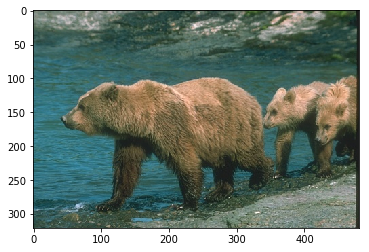

(321, 481, 3)

In [12]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

plt.imshow(y)
plt.show()
y.shape

## K-Means Algorithm Implementation

#### Using original data

KMeans clustering time to do: 2.13s


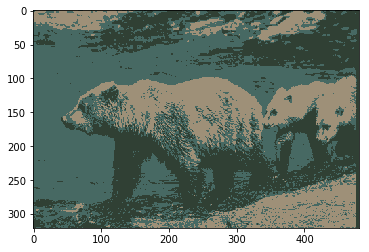

In [13]:
import time
from sklearn.cluster import KMeans
import numpy as np

#From original data
#Reshape to 2D - one column per rgb colour
data = y.reshape(y.shape[0] * y.shape[1], 3)

# Initializing KMeans
kmeans = KMeans(n_clusters=3)

t0 = time.time()
# Fitting with inputs
kmeans = kmeans.fit(data)

#Finding lables for inputs
labels = kmeans.predict(data)

# Find corresponding center to data
new_colors = kmeans.cluster_centers_[kmeans.predict(data)]
t1 = time.time()

# Reshape data to 3D 
y_recolored = new_colors.reshape(y.shape)
y_recolored = y_recolored.astype(np.uint8)

# #Plot data
title = 'KMeans clustering time to do: %.2fs' % (t1 - t0)
print(title)
plt.imshow(y_recolored)
plt.show()

In [14]:
# This is the number of unique colors
print(np.unique(y_recolored))
len(np.unique(y_recolored))

[ 48  52  64  71  99 105 120 144 158]


9

#### Using PCA for the data

KMeans clustering time to do: 1.62s


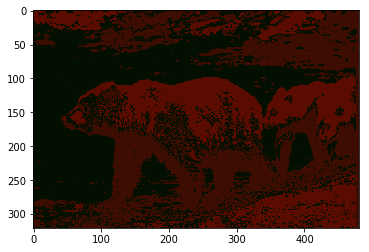

In [15]:
from sklearn.decomposition import PCA

#Using PCA
pca = PCA(n_components=3)
reduced_data = pca.fit_transform(data)

# Initializing KMeans
kmeans = KMeans(n_clusters=3)
# Fitting with inputs

t0 = time.time()
kmeans = kmeans.fit(reduced_data)

new_colors = kmeans.cluster_centers_[kmeans.predict(reduced_data)]
t1 = time.time()
y_recolored = np.absolute(new_colors.reshape(y.shape)) #I should not be doing absolute
y_recolored = y_recolored.astype(np.uint8)
plt.imshow(y_recolored)
title = 'KMeans clustering time to do: %.2fs' % (t1 - t0)
print(title)
plt.show()

#### Downsampling the data

KMeans clustering time to do: 0.10s


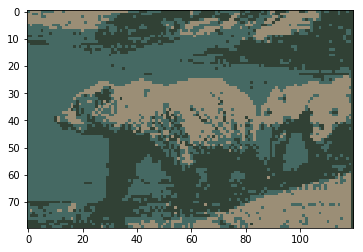

In [16]:
from skimage.transform import rescale
#Using Downsample

r = rescale(y,0.25,mode='reflect')
data = r.reshape(r.shape[0] * r.shape[1], 3)

# Initializing KMeans
kmeans = KMeans(n_clusters=3)
# Fitting with inputs
t0 = time.time()
kmeans = kmeans.fit(data)

new_colors = kmeans.cluster_centers_[kmeans.predict(data)]
t1 = time.time()
r_recolored = new_colors.reshape(r.shape)
plt.imshow(r_recolored)
title = 'KMeans clustering time to do: %.2fs' % (t1 - t0)
print(title)
plt.show()

In [17]:
# This is the number of unique colors
print(np.unique(r_recolored))
len(np.unique(r_recolored))
r_recolored.shape

[0.19386219 0.20798706 0.25808968 0.27384671 0.39164583 0.41415477
 0.46580576 0.55721415 0.61110643]


(80, 120, 3)

#### Color segmentation into different images

In [18]:
first_color = np.copy(new_colors)
second_color = np.copy(new_colors)
third_color = np.copy(new_colors)

t0 = time.time()
for colors in range(first_color.shape[0]):
    if np.array_equal(first_color[colors],[np.unique(r_recolored)[3], np.unique(r_recolored)[5], np.unique(r_recolored)[4]]):
#         first_color[colors] = [np.unique(r_recolored)[3], np.unique(r_recolored)[5], np.unique(r_recolored)[4]]
          first_color[colors] = [0,0,255]
    else:
        first_color[colors] = [0,0,0]

for colors in range(second_color.shape[0]):
    if np.array_equal(second_color[colors],[np.unique(r_recolored)[8], np.unique(r_recolored)[7], np.unique(r_recolored)[6]]):
#         first_color[colors] = [np.unique(r_recolored)[3], np.unique(r_recolored)[5], np.unique(r_recolored)[4]]
          second_color[colors] = [0,255,0]
    else:
        second_color[colors] = [0,0,0]
        
for colors in range(third_color.shape[0]):
    if np.array_equal(third_color[colors],[np.unique(r_recolored)[0], np.unique(r_recolored)[2], np.unique(r_recolored)[1]]):
#         first_color[colors] = [np.unique(r_recolored)[3], np.unique(r_recolored)[5], np.unique(r_recolored)[4]]
          third_color[colors] = [255,0,0]
    else:
        third_color[colors] = [0,0,0]
t1 = time.time()
title = 'Segmentate 1 color time to do: %.2fs' % (t1 - t0)
print(title)


#[np.unique(r_recolored)[3], np.unique(r_recolored)[5], np.unique(r_recolored)[4]] -  Color #1
# [np.unique(r_recolored)[8], np.unique(r_recolored)[7], np.unique(r_recolored)[6]] - Color #2
# [np.unique(r_recolored)[0], np.unique(r_recolored)[2], np.unique(r_recolored)[1]] - Color #3
# Hopefully this ordering is consistent and how to scale for more color? -- Inacceptable time to run so many pictures

Segmentate 1 color time to do: 48.87s


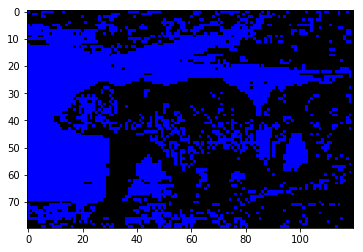

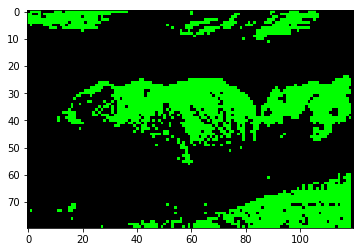

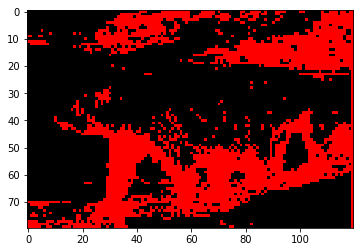

In [19]:
f_recolored_1 = (first_color.reshape(r.shape)).astype(int)
f_recolored_2 = (second_color.reshape(r.shape)).astype(int)
f_recolored_3 = (third_color.reshape(r.shape)).astype(int)

plt.figure(1)
plt.imshow(f_recolored_1)
plt.figure(2)
plt.imshow(f_recolored_2)
plt.figure(3)
plt.imshow(f_recolored_3)
plt.show()

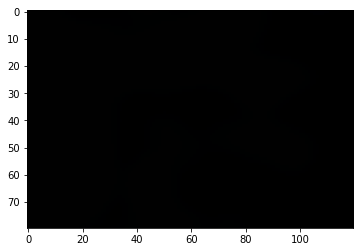

In [20]:
from skimage import measure
from skimage import filters

n = 12
l = 256
im = filters.gaussian(f_recolored_1, sigma= l / (4. * n),multichannel=False)
blobs = im > 0.7 * im.mean()

all_labels = measure.label(blobs)
blobs_labels = measure.label(blobs, background=0)

plt.imshow(blobs_labels )
plt.show()
#http://cs-tklab.na-inet.jp/~tkouya/python/scipy-lectures/packages/scikit-image/index.html#labeling-connected-components-of-a-discrete-image

#### Using grey scale of data

KMeans clustering time to do: 0.11s


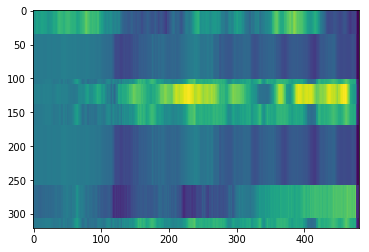

In [21]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

#Turn into grayscale
bears_gray = rgb2gray(y)

# Initializing KMeans
kmeans = KMeans(n_clusters=5)
# Fitting with inputs
t0 = time.time()
kmeans = kmeans.fit(bears_gray)

new_colors = kmeans.cluster_centers_[kmeans.predict(bears_gray)]
t1 = time.time()
# r_recolored = new_colors.reshape(r.shape)
plt.imshow(new_colors)
title = 'KMeans clustering time to do: %.2fs' % (t1 - t0)
print(title)
plt.show()

#### If I include my data from the coordinates of my pixels

[[ 0.   0. ]
 [ 0.   0.1]
 [ 0.   0.2]
 ...
 [32.  47.8]
 [32.  47.9]
 [32.  48. ]]
KMeans clustering time to do: 13.00s


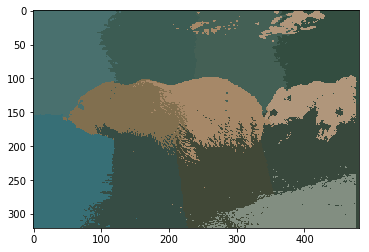

In [24]:
import time
from sklearn.cluster import KMeans
import numpy as np


coord_y = []
for ys in range(y.shape[0]):
    for xs in range(y.shape[1]):
        coord_y.append((ys,xs))
print((np.array(coord_y))*0.1)
data = y.reshape(y.shape[0] * y.shape[1], 3)
# print(new_data)
new_data = np.concatenate((data,np.array(coord_y)), axis=1)

# img_5d = np.reshape(new_data, (321, 481, 5))
# # img_5d[:,:,0:3]

# #From original data
# #Reshape to 2D - one column per rgb colour
# data = y.reshape(y.shape[0] * y.shape[1], 3)

# Initializing KMeans
kmeans = KMeans(n_clusters=12)

t0 = time.time()
# Fitting with inputs
kmeans = kmeans.fit(new_data)

#Finding lables for inputs
labels = kmeans.predict(new_data)

# Find corresponding center to data
new_colors = kmeans.cluster_centers_[kmeans.predict(new_data)]
t1 = time.time()

# Reshape data to 3D 
y_recolored = img_5d = np.reshape(new_colors, (321, 481, 5))
y_recolored = y_recolored.astype(np.uint8)

# #Plot data
title = 'KMeans clustering time to do: %.2fs' % (t1 - t0)
print(title)
plt.imshow(y_recolored[:,:,0:3])
plt.show()

#### The big issue here is the illumination, which is a big problem for machine learning

## Self-Organizing Map Algorithm Implementation

#### Example implementation - Using MiniSom library

training...
quantization...
building new image...
done.


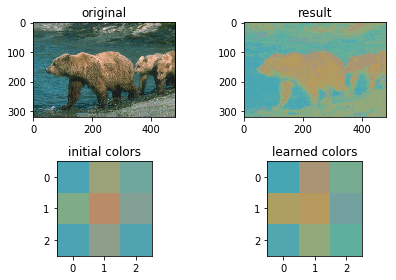

In [25]:
from minisom import MiniSom

import numpy as np
import matplotlib.pyplot as plt

# reshaping the pixels matrix
pixels = np.reshape(y, (y.shape[0]*y.shape[1], 3))

# SOM initialization and training
print('training...')
som = MiniSom(3, 3, 3, sigma=0.1, learning_rate=0.2)  # 3x3 = 9 final colors
som.random_weights_init(pixels)
starting_weights = som.get_weights().copy()  # saving the starting weights
som.train_random(pixels, 100)

print('quantization...')
qnt = som.quantization(pixels)  # quantize each pixels of the image
print('building new image...')
clustered = np.zeros(y.shape)
for i, q in enumerate(qnt):  # place the quantized values into a new image
    clustered[np.unravel_index(i, dims=(y.shape[0], y.shape[1]))] = q
print('done.')

# show the result
plt.figure(1)
plt.subplot(221)
plt.title('original')
plt.imshow(y)
plt.subplot(222)
plt.title('result')
plt.imshow(clustered)

plt.subplot(223)
plt.title('initial colors')
plt.imshow(starting_weights, interpolation='none')
plt.subplot(224)
plt.title('learned colors')
plt.imshow(som.get_weights(), interpolation='none')

plt.tight_layout()
plt.show()

Self-Organizing Map clustering time to do: 0.11s


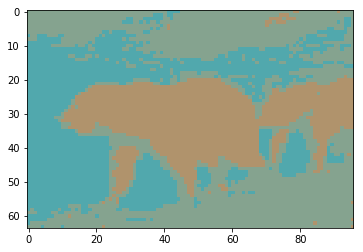

In [26]:
from minisom import MiniSom

import numpy as np
import matplotlib.pyplot as plt
# reshaping the pixels matrix
r = rescale(y,0.2,mode='reflect')
pixels = np.reshape(r, (r.shape[0]*r.shape[1], 3))

n_clusters = 3

t0 = time.time()
som = MiniSom(1, n_clusters, 3, sigma=0.1, learning_rate=0.2)  # 3x1 = 3 final colors
som.random_weights_init(pixels)
starting_weights = som.get_weights().copy()  # saving the starting weights
som.train_random(pixels, 100)

qnt = som.quantization(pixels)  # quantize each pixels of the image
clustered = np.zeros(r.shape)
for i, q in enumerate(qnt):  # place the quantized values into a new image
    clustered[np.unravel_index(i, dims=(r.shape[0], r.shape[1]))] = q
t1 = time.time()

# plt.figure(1)
# plt.subplot(221)
plt.imshow(clustered)
title = 'Self-Organizing Map clustering time to do: %.2fs' % (t1 - t0)
print(title)
# plt.subplot(223)
# plt.title('learned colors')
# plt.imshow(som.get_weights(), interpolation='none')
plt.show()

In [27]:
# This is the number of unique colors
print(np.unique(clustered))
len(np.unique(clustered))

[0.31914182 0.42618582 0.52214075 0.56408515 0.58023137 0.63966943
 0.66090073 0.67923393 0.69404409]


9

## Fuzzy C-Means Algorithm Implementation

#### Using grey scale data

Fuzzy C-Means clustering time to do: 0.19s


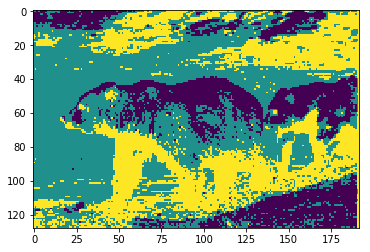

In [28]:
import skfuzzy
from skimage.transform import rescale


#Using Downsample
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

#Turn into grayscale
bears_gray = rgb2gray(y)

# Rescale and reshape data
r = rescale(bears_gray,0.4,mode='reflect')
I = r.reshape((1, -1))

n_clusters = 3
t0 = time.time()
# Run algorithm
fzz = skfuzzy.cluster.cmeans(I, c = n_clusters, m = 2, error=0.005, maxiter=1000)
t1 = time.time()
#Find clustering from fuzzy segmentation
img_clustered = np.argmax(fzz[1], axis=0).astype(float)
img_clustered.shape = r.shape

plt.imshow(img_clustered)
title = 'Fuzzy C-Means clustering time to do: %.2fs' % (t1 - t0)
print(title)
plt.show()

In [29]:
# This is the number of unique colors
print(np.unique(img_clustered))
len(np.unique(img_clustered))

[0. 1. 2.]


3

## Spectral Clustering Algorithm Implementation

##### Using orignal data - Don't run this! it takes forever

In [30]:
# from sklearn.cluster import spectral_clustering
# from sklearn.feature_extraction import image
# from skimage.transform import downscale_local_mean
# from skimage.transform import rescale
# from skimage.transform import resize
# from sklearn.preprocessing import scale

# bears = rescale(y,0.1,mode='reflect')

# # Convert the image into a graph with the value of the gradient on the
# # edges.
# # mask = bears.astype(bool)
# graph = image.img_to_graph(bears)#, mask=mask)

# # Take a decreasing function of the gradient: an exponential
# # The smaller beta is, the more independent the segmentation is of the
# # actual image. For beta=1, the segmentation is close to a voronoi
# beta = 5
# eps = 1e-6
# graph.data = np.exp(-beta * graph.data / graph.data.std()) + eps

# labels = spectral_clustering(graph, n_clusters=3)
# # label_im = -np.ones(mask.shape)
# # label_im[mask] = labels

# labels = labels.reshape(bears.shape)

# plt.imshow(labels)
# plt.show()

#### This one is based on the example - works but we lose the color data

Spectral clustering: kmeans, 3.11s
Spectral clustering: discretize, 3.54s


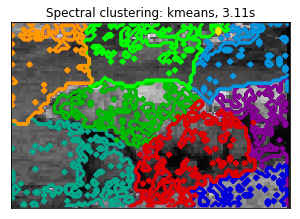

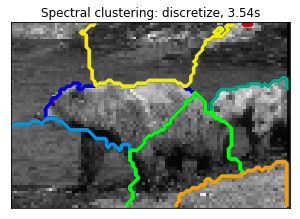

In [31]:
import time
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

from sklearn.feature_extraction import image
from sklearn.cluster import spectral_clustering


def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

#Turn into grayscale
bears_gray = rgb2gray(y)

# Resize it to 10% of the original size to speed up the processing
bears_gray = rescale(bears_gray,0.2,mode='reflect')

# Convert the image into a graph with the value of the gradient on the
# edges.
graph = image.img_to_graph(bears_gray)

# Take a decreasing function of the gradient: an exponential
# The smaller beta is, the more independent the segmentation is of the
# actual image. For beta=1, the segmentation is close to a voronoi
beta = 5
eps = 1e-6
graph.data = np.exp(-beta * graph.data / graph.data.std()) + eps

# Apply spectral clustering (this step goes much faster if you have pyamg
# installed)
N_REGIONS = 10

for assign_labels in ('kmeans', 'discretize'):
    t0 = time.time()
    labels = spectral_clustering(graph, n_clusters=N_REGIONS,
                                 assign_labels=assign_labels, random_state=1)
    t1 = time.time()
    labels = labels.reshape(bears_gray.shape)

    plt.figure(figsize=(5, 5))
    plt.imshow(bears_gray, cmap=plt.cm.gray)
    for l in range(N_REGIONS):
        plt.contour(labels == l,
                    colors=[plt.cm.nipy_spectral(l / float(N_REGIONS))])
    plt.xticks(())
    plt.yticks(())
    title = 'Spectral clustering: %s, %.2fs' % (assign_labels, (t1 - t0))
    print(title)
    plt.title(title)
plt.show()

#### This one uses the example and colors the separete regions

Spectral clustering time to do: 0.29s


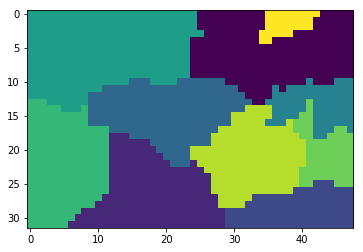

In [32]:
import time
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

from sklearn.feature_extraction import image
from sklearn.cluster import spectral_clustering

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

#Turn into grayscale
bears_gray = rgb2gray(y)

bears_gray = rescale(bears_gray,0.1,mode='reflect')

graph = image.img_to_graph(bears_gray)#, mask=mask)

beta = 5
eps = 1e-6
graph.data = np.exp(-beta * graph.data / graph.data.std()) + eps

n_clusters = 10

t0 = time.time()
labels = spectral_clustering(graph, n_clusters=n_clusters, assign_labels = 'discretize')
t1 = time.time()
labels = labels.reshape(bears_gray.shape)


title = 'Spectral clustering time to do: %.2fs' % (t1 - t0)
print(title)
plt.imshow(labels)
plt.show()

In [33]:
# This is the number of unique colors
print(np.unique(labels))
len(np.unique(labels))

[0 1 2 3 4 5 6 7 8 9]


10

#### These are two examples I based myself from

In [34]:
# import numpy as np
# import matplotlib.pyplot as plt

# from sklearn.feature_extraction import image
# from sklearn.cluster import spectral_clustering

# l = 100
# x, y = np.indices((l, l))

# center1 = (28, 24)
# center2 = (40, 50)
# center3 = (67, 58)
# center4 = (24, 70)

# radius1, radius2, radius3, radius4 = 16, 14, 15, 14

# circle1 = (x - center1[0]) ** 2 + (y - center1[1]) ** 2 < radius1 ** 2
# circle2 = (x - center2[0]) ** 2 + (y - center2[1]) ** 2 < radius2 ** 2
# circle3 = (x - center3[0]) ** 2 + (y - center3[1]) ** 2 < radius3 ** 2
# circle4 = (x - center4[0]) ** 2 + (y - center4[1]) ** 2 < radius4 ** 2

# # #############################################################################
# # 4 circles
# img = circle1 + circle2 + circle3 + circle4

# # We use a mask that limits to the foreground: the problem that we are
# # interested in here is not separating the objects from the background,
# # but separating them one from the other.
# mask = img.astype(bool)

# img = img.astype(float)
# img += 1 + 0.2 * np.random.randn(*img.shape)

# # Convert the image into a graph with the value of the gradient on the
# # edges.
# graph = image.img_to_graph(img, mask=mask)

# # Take a decreasing function of the gradient: we take it weakly
# # dependent from the gradient the segmentation is close to a voronoi
# graph.data = np.exp(-graph.data / graph.data.std())

# # Force the solver to be arpack, since amg is numerically
# # unstable on this example
# labels = spectral_clustering(graph, n_clusters=4, eigen_solver='arpack')
# label_im = -np.ones(mask.shape)
# label_im[mask] = labels
# label_im.shape

# plt.matshow(img)
# plt.matshow(label_im)


# import time

# import numpy as np
# import scipy as sp
# import matplotlib.pyplot as plt

# from sklearn.feature_extraction import image
# from sklearn.cluster import spectral_clustering


# # load the raccoon face as a numpy array
# try:  # SciPy >= 0.16 have face in misc
#     from scipy.misc import face
#     face = face(gray=True)
# except ImportError:
#     face = sp.face(gray=True)

# # Resize it to 10% of the original size to speed up the processing
# face = rescale(face,0.1,mode='reflect')

# # Convert the image into a graph with the value of the gradient on the
# # edges.
# graph = image.img_to_graph(face)

# # Take a decreasing function of the gradient: an exponential
# # The smaller beta is, the more independent the segmentation is of the
# # actual image. For beta=1, the segmentation is close to a voronoi
# beta = 5
# eps = 1e-6
# graph.data = np.exp(-beta * graph.data / graph.data.std()) + eps

# # Apply spectral clustering (this step goes much faster if you have pyamg
# # installed)
# N_REGIONS = 25

# for assign_labels in ('kmeans', 'discretize'):
#     t0 = time.time()
#     labels = spectral_clustering(graph, n_clusters=N_REGIONS,
#                                  assign_labels=assign_labels, random_state=1)
#     t1 = time.time()
#     labels = labels.reshape(face.shape)

#     plt.figure(figsize=(5, 5))
#     plt.imshow(face, cmap=plt.cm.gray)
#     for l in range(N_REGIONS):
#         plt.contour(labels == l,
#                     colors=[plt.cm.nipy_spectral(l / float(N_REGIONS))])
#     plt.xticks(())
#     plt.yticks(())
#     title = 'Spectral clustering: %s, %.2fs' % (assign_labels, (t1 - t0))
#     print(title)
#     plt.title(title)
# plt.show()

### Gaussian Mixture Models

#### Using a downsampled version of data

Gaussian Mixture Model clustering time to do: 0.24s


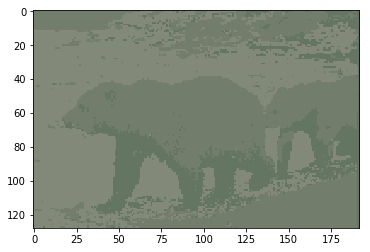

In [35]:
from sklearn import mixture

# reshaping the pixels matrix
r = rescale(y,0.4,mode='reflect')
img = np.reshape(r, (r.shape[0]*r.shape[1], 3))

n_clusters = 3

gmm = mixture.GaussianMixture(n_components=n_clusters, covariance_type='full')
t0 = time.time()
img_gmm = gmm.fit(img)
img_labels = img[gmm.predict(img)].astype(float)
t1 = time.time()
img_labels.shape = r.shape

plt.imshow(img_labels)
title = 'Gaussian Mixture Model clustering time to do: %.2fs' % (t1 - t0)
print(title)
plt.show()

In [36]:
# This is the number of unique colors
print(np.unique(img_labels))
len(np.unique(img_labels))

[0.38522758 0.39379193 0.42122097 0.44895139 0.45900596 0.47789227
 0.49028524 0.51511653 0.5403584 ]


9

# Part 2 - Hyperspectral Images

## Pavia Image

In [2]:
import scipy.io as sio
import os

hsimg_load = sio.loadmat('PaviaHyperIm.mat')
hsimg_data = hsimg_load['PaviaHyperIm']
himage_display = hsimg_data[:,:,0:3]
hsimg_data[:,:,0:3].shape

(610, 340, 3)

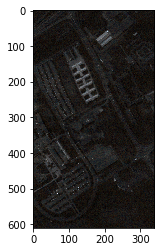

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

plt.imshow(himage_display)
plt.show()

#### Number of component selection for PCA

We need about 3 components to retain 95% of the variance


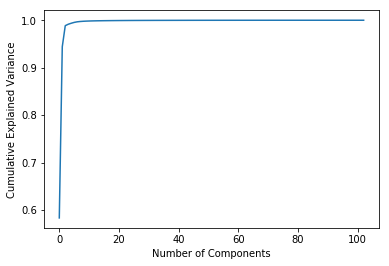

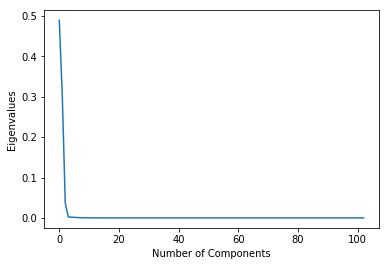

In [5]:
from sklearn.decomposition import PCA
data = hsimg_data.reshape(hsimg_data.shape[0] * hsimg_data.shape[1], hsimg_data.shape[2])
pca = PCA().fit(data)
cum_var = np.cumsum(pca.explained_variance_ratio_)
eigenvalues = pca.explained_variance_

count = 0
for var in cum_var:
    count += 1
    if var >= 0.95:
        n_components = count
        answer = "We need about "+ str(n_components) + " components to retain 95% of the variance"
        print(answer)
        break
        
plt.figure(1)
plt.plot(cum_var)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.figure(2)
plt.plot(eigenvalues)
plt.xlabel('Number of Components')
plt.ylabel('Eigenvalues')
plt.show()

# Minumum Noise Factor --> Similar to PCA but removes noise from bands

#### Do PCA

In [7]:
#Reshape to 2D - one column per rgb colour
data = hsimg_data.reshape(hsimg_data.shape[0] * hsimg_data.shape[1], hsimg_data.shape[2])

#Using PCA
pca = PCA(n_components=n_components)
reduced_data = pca.fit_transform(data)

### KMeans Algorithm

#### Scale RGB values after doing Kmeans

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


KMeans clustering time to do: 12.89s


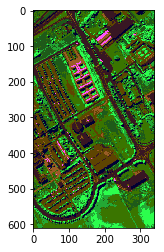

In [41]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from skimage.transform import rescale
import time
from sklearn.cluster import KMeans
import numpy as np

# Initializing KMeans
kmeans = KMeans(n_clusters=9)
# Fitting with inputs
t0 = time.time()
kmeans = kmeans.fit(reduced_data)

new_colors = kmeans.cluster_centers_[kmeans.predict(reduced_data)]
min_max_scaler = MinMaxScaler()
new_colors_scaled = min_max_scaler.fit_transform(new_colors)
# new_colors[new_colors <= 0] = 0
# new_colors[new_colors >= 1] = 1
t1 = time.time()
r_recolored = new_colors_scaled.reshape(hsimg_data[:,:,0:3].shape)
plt.imshow(r_recolored)
title = 'KMeans clustering time to do: %.2fs' % (t1 - t0)
print(title)
plt.show()

In [42]:
np.unique(new_colors_scaled)

array([0.        , 0.00441922, 0.08832099, 0.09908852, 0.1182198 ,
       0.13762895, 0.13868024, 0.14846602, 0.17589967, 0.20589748,
       0.20692589, 0.22170955, 0.23039018, 0.26753379, 0.30468432,
       0.32309745, 0.35471169, 0.36103949, 0.36886029, 0.45937923,
       0.60340198, 0.65951339, 1.        , 1.        , 1.        ])

#### Scale RBG values before Kmeans

KMeans clustering time to do: 14.48s


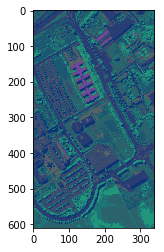

In [43]:
#Reshape to 2D - one column per rgb colour
data = hsimg_data.reshape(hsimg_data.shape[0] * hsimg_data.shape[1], hsimg_data.shape[2])

#Using PCA
pca = PCA(n_components=n_components)
reduced_data = pca.fit_transform(data)
min_max_scaler = MinMaxScaler()
reduced_data_scaled = min_max_scaler.fit_transform(reduced_data)

# Initializing KMeans
kmeans = KMeans(n_clusters=9)
# Fitting with inputs
t0 = time.time()
kmeans = kmeans.fit(reduced_data_scaled)

new_colors = kmeans.cluster_centers_[kmeans.predict(reduced_data_scaled)]

t1 = time.time()
r_recolored = new_colors.reshape(hsimg_data[:,:,0:3].shape)
plt.imshow(r_recolored)
title = 'KMeans clustering time to do: %.2fs' % (t1 - t0)
print(title)
plt.show()

#### If we downsample the data after PCA

KMeans clustering time to do: 0.40s


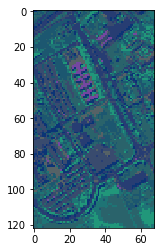

In [44]:
#Reshape to 2D - one column per rgb colour
data = hsimg_data.reshape(hsimg_data.shape[0] * hsimg_data.shape[1], hsimg_data.shape[2])

#Using PCA
pca = PCA(n_components=n_components)
reduced_data = pca.fit_transform(data)
min_max_scaler = MinMaxScaler()
reduced_data_scaled = min_max_scaler.fit_transform(reduced_data)
r_data = reduced_data_scaled .reshape(hsimg_data[:,:,0:3].shape)
r = rescale(r_data,0.2,mode='reflect')
reduced_data = r.reshape(r.shape[0] * r.shape[1], 3)

# Initializing KMeans
kmeans = KMeans(n_clusters=9)
# Fitting with inputs
t0 = time.time()
kmeans = kmeans.fit(reduced_data)

new_colors = kmeans.cluster_centers_[kmeans.predict(reduced_data)]

t1 = time.time()
r_recolored = new_colors.reshape(r[:,:,0:3].shape)
plt.imshow(r_recolored)
title = 'KMeans clustering time to do: %.2fs' % (t1 - t0)
print(title)
plt.show()

### SOM Algorithm

Self-Organizing Map clustering time to do: 4.16s


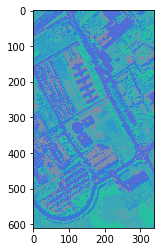

In [45]:
from minisom import MiniSom

import numpy as np
import matplotlib.pyplot as plt


#Reshape to 2D - one column per rgb colour
data = hsimg_data.reshape(hsimg_data.shape[0] * hsimg_data.shape[1], hsimg_data.shape[2])

#Using PCA
pca = PCA(n_components=n_components)
reduced_data = pca.fit_transform(data)

min_max_scaler = MinMaxScaler()
reduced_data_scaled = min_max_scaler.fit_transform(reduced_data)


r_data = reduced_data_scaled.reshape(hsimg_data[:,:,0:3].shape)
r = rescale(r_data,1,mode='reflect')
reduced_data = r.reshape(r.shape[0] * r.shape[1], 3)
pixels = reduced_data
# # reshaping the pixels matrix
# r = rescale(y,0.2,mode='reflect')
# pixels = np.reshape(r, (r.shape[0]*r.shape[1], 3))

n_clusters = 9

t0 = time.time()
som = MiniSom(1, n_clusters, 3, sigma=0.1, learning_rate=0.2)  # 3x1 = 3 final colors
som.random_weights_init(reduced_data)
starting_weights = som.get_weights().copy()  # saving the starting weights
som.train_random(pixels, 100)

qnt = som.quantization(pixels)  # quantize each pixels of the image
clustered = np.zeros(r.shape)
for i, q in enumerate(qnt):  # place the quantized values into a new image
    clustered[np.unravel_index(i, dims=(r.shape[0], r.shape[1]))] = q
t1 = time.time()

# plt.figure(1)
# plt.subplot(221)
plt.imshow(clustered)
title = 'Self-Organizing Map clustering time to do: %.2fs' % (t1 - t0)
print(title)
# plt.subplot(223)
# plt.title('learned colors')
# plt.imshow(som.get_weights(), interpolation='none')
plt.show()

In [46]:
# This is the number of unique colors
print(np.unique(clustered))
len(np.unique(clustered))

[0.16284207 0.18224273 0.19722416 0.20935201 0.24008193 0.24501913
 0.32206706 0.33899313 0.4337186  0.47667748 0.51372327 0.54788931
 0.60047432 0.63662481 0.63700478 0.63872482 0.66023155 0.66023247
 0.67614137 0.69073458 0.69483702 0.71165564 0.74552765 0.75346358
 0.77860014 0.84152302 0.85378587]


27

### Fuzzy C-Means

Fuzzy C-Means clustering time to do: 6.12s


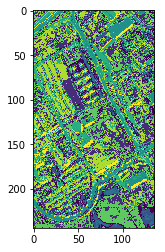

In [10]:
from sklearn.preprocessing import MinMaxScaler
from skimage.transform import rescale
import skfuzzy
import time


#Reshape to 2D - one column per rgb colour
data = hsimg_data.reshape(hsimg_data.shape[0] * hsimg_data.shape[1], hsimg_data.shape[2])

#Using PCA
pca = PCA(n_components=n_components)
reduced_data = pca.fit_transform(data)


min_max_scaler = MinMaxScaler()
reduced_data_scaled = min_max_scaler.fit_transform(reduced_data)


r_data = reduced_data_scaled.reshape(hsimg_data[:,:,0:3].shape)
r = rescale(r_data,1,mode='reflect')

#Using Downsample
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

#Turn into grayscale
bears_gray = rgb2gray(r)

# Rescale and reshape data
r = rescale(bears_gray,0.4,mode='reflect')
I = r.reshape((1, -1))

n_clusters = 9
t0 = time.time()
# Run algorithm
fzz = skfuzzy.cluster.cmeans(I, c = n_clusters, m = 2, error=0.005, maxiter=1000)
t1 = time.time()
#Find clustering from fuzzy segmentation
img_clustered = np.argmax(fzz[1], axis=0).astype(float)
img_clustered.shape = r.shape

plt.imshow(img_clustered)
title = 'Fuzzy C-Means clustering time to do: %.2fs' % (t1 - t0)
print(title)
plt.show()

### Spectral Clustering Algorithm

Spectral clustering time to do: 1.23s


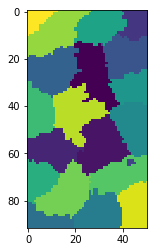

In [48]:
import time
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

from sklearn.feature_extraction import image
from sklearn.cluster import spectral_clustering

import skfuzzy
from skimage.transform import rescale

#Reshape to 2D - one column per rgb colour
data = hsimg_data.reshape(hsimg_data.shape[0] * hsimg_data.shape[1], hsimg_data.shape[2])

#Using PCA
pca = PCA(n_components=n_components)
reduced_data = pca.fit_transform(data)


min_max_scaler = MinMaxScaler()
reduced_data_scaled = min_max_scaler.fit_transform(reduced_data)


r_data = reduced_data_scaled.reshape(hsimg_data[:,:,0:3].shape)
r = rescale(r_data,0.15,mode='reflect')

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

#Turn into grayscale
bears_gray = rgb2gray(r)

# bears_gray = rescale(bears_gray,0.1,mode='reflect')

graph = image.img_to_graph(bears_gray)#, mask=mask)

beta = 5
eps = 1e-6
graph.data = np.exp(-beta * graph.data / graph.data.std()) + eps

n_clusters = 20

t0 = time.time()
labels = spectral_clustering(graph, n_clusters=n_clusters, assign_labels = 'discretize')
t1 = time.time()
labels = labels.reshape(bears_gray.shape)


title = 'Spectral clustering time to do: %.2fs' % (t1 - t0)
print(title)
plt.imshow(labels)
plt.show()

### Gaussian Mixture Model Algorithm

Gaussian Mixture Model clustering time to do: 16.34s


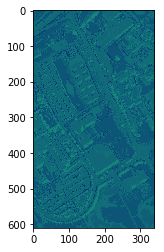

In [49]:
from sklearn import mixture

#Reshape to 2D - one column per rgb colour
data = hsimg_data.reshape(hsimg_data.shape[0] * hsimg_data.shape[1], hsimg_data.shape[2])

#Using PCA
pca = PCA(n_components=n_components)
reduced_data = pca.fit_transform(data)


min_max_scaler = MinMaxScaler()
reduced_data_scaled = min_max_scaler.fit_transform(reduced_data)


r_data = reduced_data_scaled.reshape(hsimg_data[:,:,0:3].shape)

# reshaping the pixels matrix
r = rescale(r_data,1,mode='reflect')
img = np.reshape(r, (r.shape[0]*r.shape[1], 3))

n_clusters = 9

gmm = mixture.GaussianMixture(n_components=n_clusters, covariance_type='full')
t0 = time.time()
img_gmm = gmm.fit(img)
img_labels = img[gmm.predict(img)].astype(float)
t1 = time.time()
img_labels.shape = r.shape

plt.imshow(img_labels)
title = 'Gaussian Mixture Model clustering time to do: %.2fs' % (t1 - t0)
print(title)
plt.show()

In [50]:
# This is the number of unique colors
print(np.unique(img_labels))
len(np.unique(img_labels))

[0.03387075 0.05334591 0.05698714 0.06022335 0.06598616 0.06605081
 0.06701994 0.0728187  0.08585095 0.23396403 0.33368859 0.37701696
 0.38245923 0.39650114 0.40665569 0.43104341 0.43688169 0.46564667
 0.46837997 0.46932793 0.47040653 0.47246026 0.47467838 0.48144559
 0.48298172 0.48468482 0.51939317]


27

## Santa Barbara Image

In [51]:
import scipy.io as sio
import os

hsimg_load = sio.loadmat('SanBarHyperIm.mat')
hsimg_data = hsimg_load['SanBarIm88x400']
himage_display = hsimg_data[:,:,0:3]
hsimg_data#[:,:,0:3].shape

array([[[0.0187, 0.0194, 0.025 , ..., 0.0999, 0.095 , 0.0929],
        [0.0099, 0.0096, 0.0184, ..., 0.0812, 0.0782, 0.0783],
        [0.024 , 0.0258, 0.0342, ..., 0.1151, 0.1075, 0.107 ],
        ...,
        [0.0023, 0.0024, 0.0023, ..., 0.0412, 0.037 , 0.0362],
        [0.0023, 0.0024, 0.0023, ..., 0.0349, 0.0335, 0.0297],
        [0.0023, 0.0024, 0.0023, ..., 0.0285, 0.0301, 0.0277]],

       [[0.0493, 0.0631, 0.08  , ..., 0.1405, 0.1356, 0.1344],
        [0.0434, 0.0567, 0.0683, ..., 0.1213, 0.1223, 0.1205],
        [0.0324, 0.0503, 0.0639, ..., 0.128 , 0.1314, 0.1239],
        ...,
        [0.0023, 0.0024, 0.0062, ..., 0.0359, 0.0333, 0.0306],
        [0.0023, 0.0024, 0.0029, ..., 0.0468, 0.0446, 0.0433],
        [0.0023, 0.0024, 0.0023, ..., 0.0257, 0.0253, 0.0242]],

       [[0.0311, 0.0482, 0.0629, ..., 0.1654, 0.1621, 0.1603],
        [0.0335, 0.0521, 0.0633, ..., 0.1663, 0.1673, 0.1657],
        [0.0058, 0.0237, 0.0392, ..., 0.1039, 0.103 , 0.1049],
        ...,
        [0.0

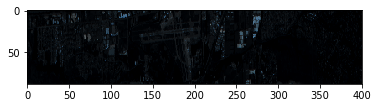

In [52]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

plt.imshow(himage_display)
plt.show()

We need about 3 components to retain 95% of the variance


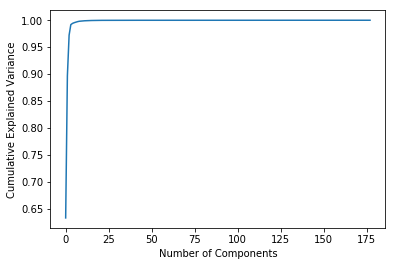

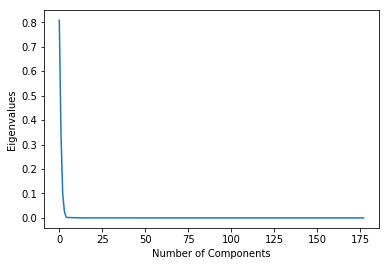

In [53]:
from sklearn.decomposition import PCA
data = hsimg_data.reshape(hsimg_data.shape[0] * hsimg_data.shape[1], hsimg_data.shape[2])
pca = PCA().fit(data)
cum_var = np.cumsum(pca.explained_variance_ratio_)
eigenvalues = pca.explained_variance_

count = 0
for var in cum_var:
    count += 1
    if var >= 0.95:
        n_components = count
        answer = "We need about "+ str(n_components) + " components to retain 95% of the variance"
        print(answer)
        break
        
plt.figure(1)
plt.plot(cum_var)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.figure(2)
plt.plot(eigenvalues)
plt.xlabel('Number of Components')
plt.ylabel('Eigenvalues')
plt.show()
# Minumum Noise Factor --> Similar to PCA but removes noise from bands

KMeans clustering time to do: 2.44s


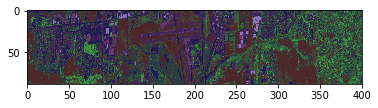

In [54]:
#Reshape to 2D - one column per rgb colour
data = hsimg_data.reshape(hsimg_data.shape[0] * hsimg_data.shape[1], hsimg_data.shape[2])

#Using PCA
pca = PCA(n_components=n_components)
reduced_data = pca.fit_transform(data)
min_max_scaler = MinMaxScaler()
reduced_data_scaled = min_max_scaler.fit_transform(reduced_data)

# Initializing KMeans
kmeans = KMeans(n_clusters=9)
# Fitting with inputs
t0 = time.time()
kmeans = kmeans.fit(reduced_data_scaled)

new_colors = kmeans.cluster_centers_[kmeans.predict(reduced_data_scaled)]

t1 = time.time()
r_recolored = new_colors.reshape(hsimg_data[:,:,0:3].shape)
plt.imshow(r_recolored)
title = 'KMeans clustering time to do: %.2fs' % (t1 - t0)
print(title)
plt.show()

Self-Organizing Map clustering time to do: 0.74s


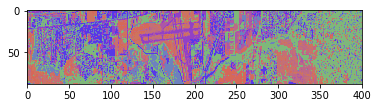

In [55]:
from minisom import MiniSom

import numpy as np
import matplotlib.pyplot as plt


#Reshape to 2D - one column per rgb colour
data = hsimg_data.reshape(hsimg_data.shape[0] * hsimg_data.shape[1], hsimg_data.shape[2])

#Using PCA
pca = PCA(n_components=n_components)
reduced_data = pca.fit_transform(data)


min_max_scaler = MinMaxScaler()
reduced_data_scaled = min_max_scaler.fit_transform(reduced_data)


r_data = reduced_data_scaled.reshape(hsimg_data[:,:,0:3].shape)
r = rescale(r_data,1,mode='reflect')
reduced_data = r.reshape(r.shape[0] * r.shape[1], 3)
pixels = reduced_data
# # reshaping the pixels matrix
# r = rescale(y,0.2,mode='reflect')
# pixels = np.reshape(r, (r.shape[0]*r.shape[1], 3))

n_clusters = 9

t0 = time.time()
som = MiniSom(1, n_clusters, 3, sigma=0.1, learning_rate=0.2)  # 3x1 = 3 final colors
som.random_weights_init(reduced_data)
starting_weights = som.get_weights().copy()  # saving the starting weights
som.train_random(pixels, 100)

qnt = som.quantization(pixels)  # quantize each pixels of the image
clustered = np.zeros(r.shape)
for i, q in enumerate(qnt):  # place the quantized values into a new image
    clustered[np.unravel_index(i, dims=(r.shape[0], r.shape[1]))] = q
t1 = time.time()

# plt.figure(1)
# plt.subplot(221)
plt.imshow(clustered)
title = 'Self-Organizing Map clustering time to do: %.2fs' % (t1 - t0)
print(title)
# plt.subplot(223)
# plt.title('learned colors')
# plt.imshow(som.get_weights(), interpolation='none')
plt.show()

Fuzzy C-Means clustering time to do: 0.84s


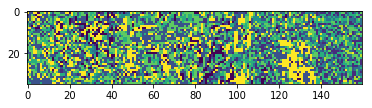

In [56]:
import skfuzzy
from skimage.transform import rescale

#Reshape to 2D - one column per rgb colour
data = hsimg_data.reshape(hsimg_data.shape[0] * hsimg_data.shape[1], hsimg_data.shape[2])

#Using PCA
pca = PCA(n_components=n_components)
reduced_data = pca.fit_transform(data)


min_max_scaler = MinMaxScaler()
reduced_data_scaled = min_max_scaler.fit_transform(reduced_data)


r_data = reduced_data_scaled.reshape(hsimg_data[:,:,0:3].shape)
r = rescale(r_data,1,mode='reflect')

#Using Downsample
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

#Turn into grayscale
bears_gray = rgb2gray(r)

# Rescale and reshape data
r = rescale(bears_gray,0.4,mode='reflect')
I = r.reshape((1, -1))

n_clusters = 9
t0 = time.time()
# Run algorithm
fzz = skfuzzy.cluster.cmeans(I, c = n_clusters, m = 2, error=0.005, maxiter=1000)
t1 = time.time()
#Find clustering from fuzzy segmentation
img_clustered = np.argmax(fzz[1], axis=0).astype(float)
img_clustered.shape = r.shape

plt.imshow(img_clustered)
title = 'Fuzzy C-Means clustering time to do: %.2fs' % (t1 - t0)
print(title)
plt.show()

Spectral clustering time to do: 3.66s


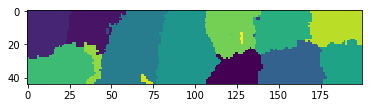

In [57]:
import time
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

from sklearn.feature_extraction import image
from sklearn.cluster import spectral_clustering

import skfuzzy
from skimage.transform import rescale

#Reshape to 2D - one column per rgb colour
data = hsimg_data.reshape(hsimg_data.shape[0] * hsimg_data.shape[1], hsimg_data.shape[2])

#Using PCA
pca = PCA(n_components=n_components)
reduced_data = pca.fit_transform(data)


min_max_scaler = MinMaxScaler()
reduced_data_scaled = min_max_scaler.fit_transform(reduced_data)


r_data = reduced_data_scaled.reshape(hsimg_data[:,:,0:3].shape)
r = rescale(r_data,0.5,mode='reflect')

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

#Turn into grayscale
bears_gray = rgb2gray(r)

# bears_gray = rescale(bears_gray,0.1,mode='reflect')

graph = image.img_to_graph(bears_gray)#, mask=mask)

beta = 5
eps = 1e-6
graph.data = np.exp(-beta * graph.data / graph.data.std()) + eps

n_clusters = 20

t0 = time.time()
labels = spectral_clustering(graph, n_clusters=n_clusters, assign_labels = 'discretize')
t1 = time.time()
labels = labels.reshape(bears_gray.shape)


title = 'Spectral clustering time to do: %.2fs' % (t1 - t0)
print(title)
plt.imshow(labels)
plt.show()

Gaussian Mixture Model clustering time to do: 1.58s


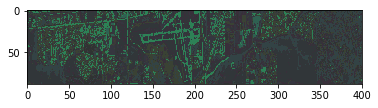

In [58]:
from sklearn import mixture

#Reshape to 2D - one column per rgb colour
data = hsimg_data.reshape(hsimg_data.shape[0] * hsimg_data.shape[1], hsimg_data.shape[2])

#Using PCA
pca = PCA(n_components=n_components)
reduced_data = pca.fit_transform(data)

min_max_scaler = MinMaxScaler()
reduced_data_scaled = min_max_scaler.fit_transform(reduced_data)


r_data = reduced_data_scaled.reshape(hsimg_data[:,:,0:3].shape)

# reshaping the pixels matrix
r = rescale(r_data,1,mode='reflect')
img = np.reshape(r, (r.shape[0]*r.shape[1], 3))

n_clusters = 9

gmm = mixture.GaussianMixture(n_components=n_clusters, covariance_type='full')
t0 = time.time()
img_gmm = gmm.fit(img)
img_labels = img[gmm.predict(img)].astype(float)
t1 = time.time()
img_labels.shape = r.shape

plt.imshow(img_labels)
title = 'Gaussian Mixture Model clustering time to do: %.2fs' % (t1 - t0)
print(title)
plt.show()

In [59]:
import scipy.io as sio
import os

hsimg_load = sio.loadmat('SanBarWavelengths.mat')
hsimg_data = hsimg_load['WaveLengths']
hsimg_data

# himage_display = hsimg_data[:,:,0:3]
# hsimg_data[:,:,0:3].shape

array([[0.3949, 0.4046, 0.4143, 0.424 , 0.4337, 0.4434, 0.4531, 0.4628,
        0.4725, 0.4822, 0.4919, 0.5016, 0.5114, 0.5211, 0.5308, 0.5406,
        0.5503, 0.56  , 0.5698, 0.5796, 0.5893, 0.5991, 0.6089, 0.6186,
        0.6284, 0.6382, 0.648 , 0.6578, 0.6676, 0.6558, 0.6656, 0.6754,
        0.6852, 0.695 , 0.7048, 0.7146, 0.7243, 0.7341, 0.7439, 0.7536,
        0.7634, 0.7731, 0.7829, 0.7926, 0.8024, 0.8121, 0.8218, 0.8315,
        0.8412, 0.8509, 0.8606, 0.8703, 0.88  , 0.8897, 0.8994, 0.9091,
        0.9188, 0.9381, 0.9477, 0.9574, 0.967 , 0.9767, 0.9863, 0.9959,
        1.0056, 1.0152, 1.0248, 1.0344, 1.044 , 1.0536, 1.0632, 1.0728,
        1.0824, 1.092 , 1.1015, 1.1111, 1.1302, 1.1398, 1.1493, 1.1589,
        1.1684, 1.1779, 1.1874, 1.197 , 1.2065, 1.216 , 1.2255, 1.235 ,
        1.2445, 1.254 , 1.2635, 1.2534, 1.2633, 1.2733, 1.2833, 1.2933,
        1.3032, 1.3132, 1.4428, 1.4528, 1.4627, 1.4727, 1.4827, 1.4927,
        1.5026, 1.5126, 1.5226, 1.5325, 1.5425, 1.5524, 1.5624, 